Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
bos.columns = boston.feature_names
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [3]:
bos['Price']=boston.target

In [4]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [6]:
# create X and y
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
X = bos[feature_cols]
y = boston.target

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

36.45948838509015
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [7]:
X = bos.drop('Price',axis=1)
Y = bos['Price']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3, random_state=100)

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)


LinearRegression()

In [10]:
print(lin_reg.intercept_)

33.115840942986


In [11]:
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


In [12]:
coeff_df = pd.DataFrame(lin_reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.076918
ZN,0.039553
INDUS,-0.006099
CHAS,2.630350
NOX,-13.141618
RM,3.844180
AGE,-0.012062
DIS,-1.376263
RAD,0.283925
TAX,-0.014064


In [13]:
pred = lin_reg.predict(X_test)
print(pred)

[34.01651319 31.05189517 22.33884524 18.0838353  20.56688064 25.98808555
 26.01540609 23.82611577 22.21599346 19.28360875 26.66123555 16.98260577
 20.99150244 15.24603617 41.09899335 20.25245593 28.49362648 19.02746332
 32.1219971  40.55013347 34.85510783 16.62558247 20.26594393 17.78965573
 13.61712506 12.31506816 27.30863471 20.08837791 18.3960775  20.36652738
 15.63267698 24.40174268 38.95380335 24.82674    31.67752332 28.52641185
 14.69895345 14.24630553 16.49088419 23.30593651 23.14883147 23.67414203
 13.62859392 21.35912779 31.4375316  26.93449598 19.05250575 16.18779463
 16.95967267 12.540738   21.69054323 20.12269149 23.8317502  24.2081579
 11.78551306 14.84388066 25.02378959 33.63041801 10.04068529 21.02680054
 17.26643982 19.29350402 18.0135788  30.0595925  21.27173516 25.42909898
 15.88028621 25.28296871 22.47917188 20.74200168 18.69920794 24.16662272
  4.47298602 16.46083658 28.38288604  9.32903069 25.14514574 35.03923207
 11.97230524 26.9903998  34.80131719 40.61070638 14.

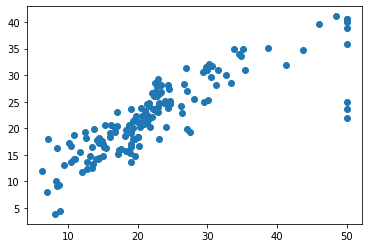

In [14]:
plt.scatter(Y_test,pred)

In [15]:
df1=pd.DataFrame({'Actual':Y_test, 'predicted':pred})
df2=df1.head(10)
df2

,Actual,predicted
0,34.6,34.016513
1,31.5,31.051895
2,20.6,22.338845
3,14.5,18.083835
4,16.2,20.566881
5,22.3,25.988086
6,22.8,26.015406
7,24.4,23.826116
8,19.8,22.215993
9,16.7,19.283609


In [16]:
from sklearn import metrics
print(f'MAE:{metrics.mean_absolute_error(Y_test, pred)}')
print(f'MSE:{metrics.mean_squared_error(Y_test, pred)}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(Y_test, pred))}')

MAE:3.4719478482701565
MSE:29.79884430147879
RMSE:5.458831770761835


In [17]:
price = boston.target

In [18]:
f_1 = '+'.join(feature_cols)
f_1

'CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [19]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='price~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=bos).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 26 Mar 2021   Prob (F-statistic):          6.72e-135
Time:                        12:09:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
fetures = bos.columns
print(fetures)
len(fetures)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')


14

In [21]:
bos['Price']=boston.target

In [22]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

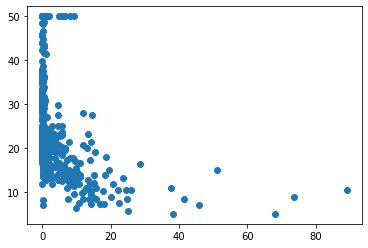

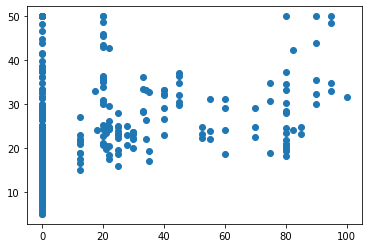

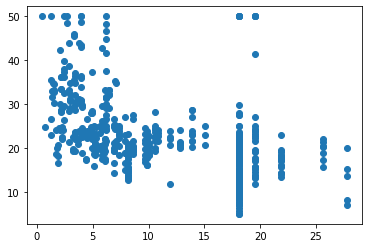

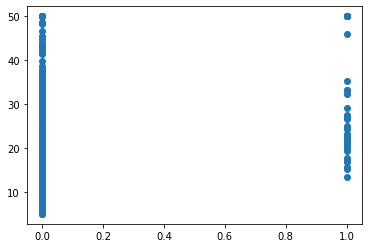

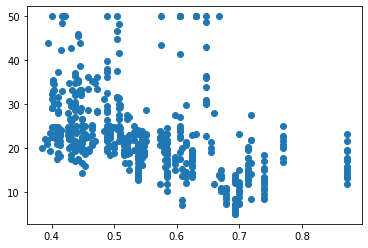

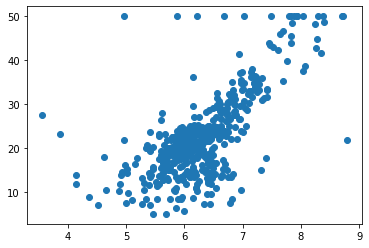

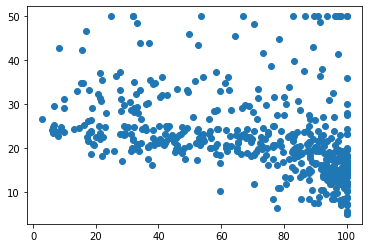

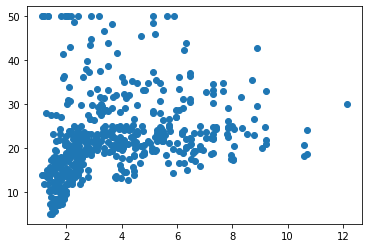

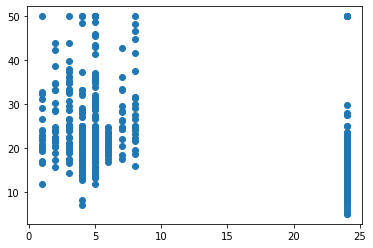

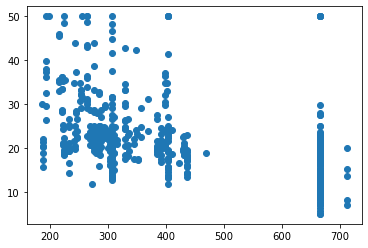

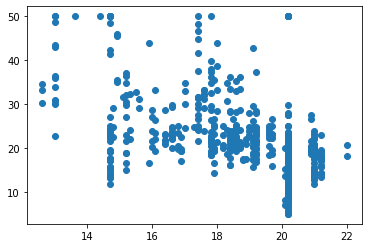

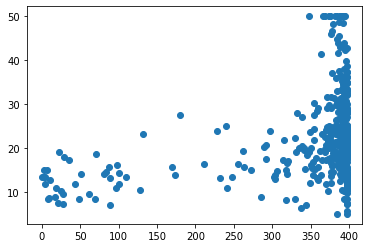

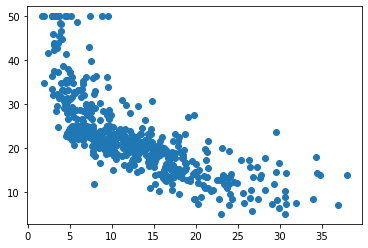

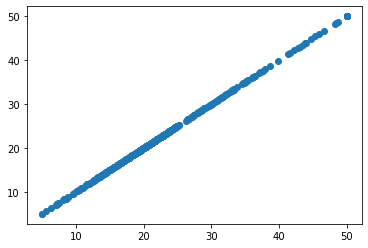

In [23]:
for i in bos.columns:
    plt.figure()
    plt.scatter(x=i, y='Price', s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None, data=bos)

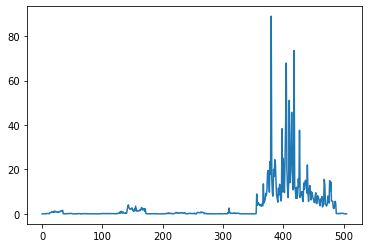

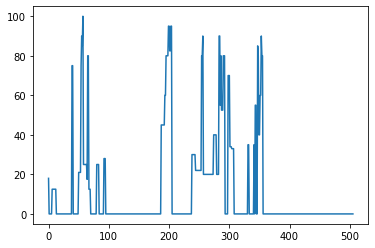

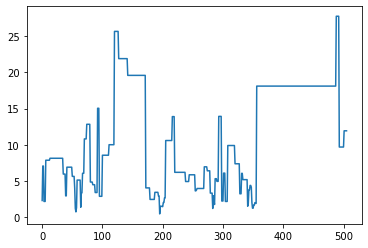

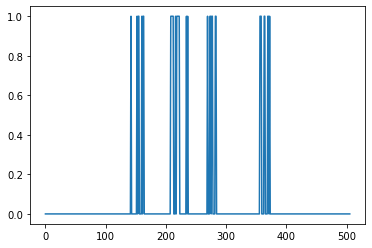

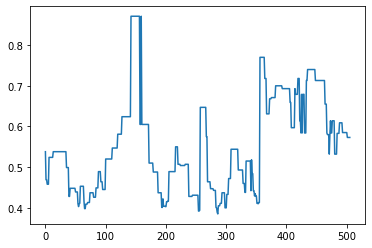

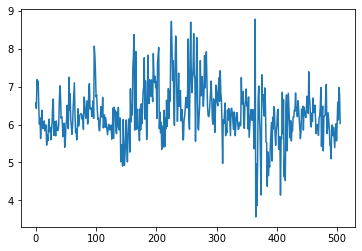

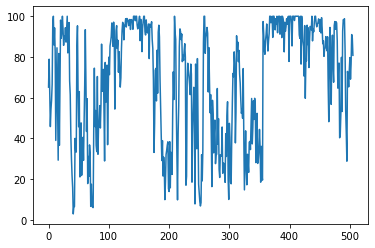

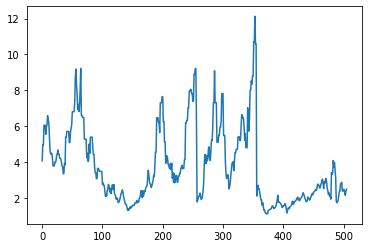

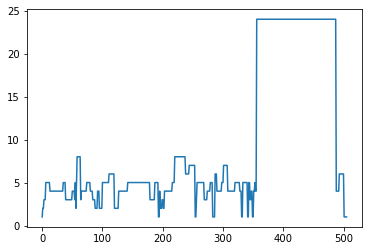

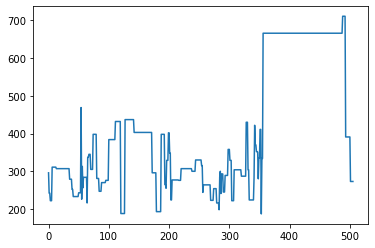

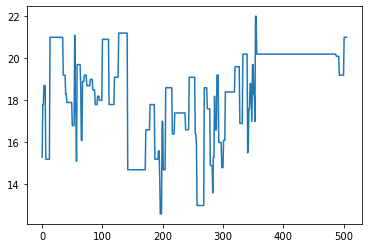

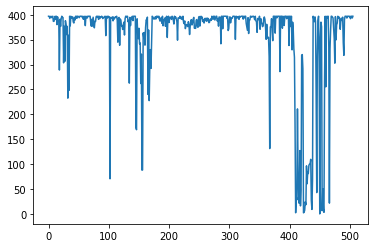

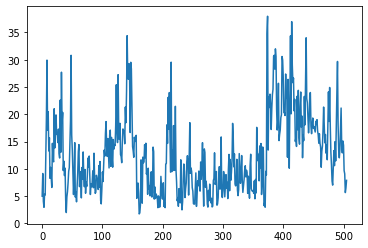

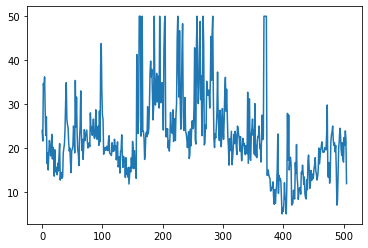

In [24]:
for i in bos.columns:
    plt.figure()
    plt.plot(bos[i])

<AxesSubplot:xlabel='CHAS', ylabel='Price'>

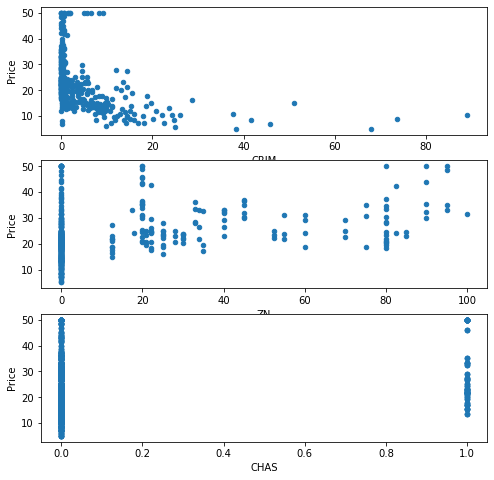

In [25]:
fig, axs = plt.subplots(3, 1, sharey=True)
bos.plot(kind='scatter', x='CRIM', y='Price', ax=axs[0], figsize=(8, 8))
bos.plot(kind='scatter', x='ZN', y='Price', ax=axs[1])
bos.plot(kind='scatter', x='CHAS', y='Price', ax=axs[2])
bos.plot(kind='scatter', x='CHAS', y='Price', ax=axs[2])
bos.plot(kind='scatter', x='CHAS', y='Price', ax=axs[2])
bos.plot(kind='scatter', x='CHAS', y='Price', ax=axs[2])

In [26]:
bos.loc[1]

CRIM         0.02731
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           6.42100
AGE         78.90000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          396.90000
LSTAT        9.14000
Price       21.60000
Name: 1, dtype: float64

In [27]:
X_new = pd.DataFrame({'CRIM':[1], 'ZN':[2], 'INDUS':[2], 'CHAS':[3], 'NOX':[0.46],'RM':[5], 'AGE':[5],
                      'DIS':[5], 'RAD':[4], 'TAX':[2],'PTRATIO':[0], 'B':[2], 'LSTAT':[0]})
X_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,2,2,3,0.46,5,5,5,4,2,0,2,0


In [28]:
lm.predict(X_new)

0    49.266101
dtype: float64